# **Medical Study Analysis for Drug Eficacy**

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [7]:
# load dataset
df = pd.read_csv("..//Python coding//med_study.csv")
df

,Treatment,Blood_Pressure_Reduction
0,Standard,6.852355
1,Standard,8.818833
2,Standard,2.202865
3,Standard,6.125938
4,Standard,3.698715
...,...,...
495,New,6.437799
496,New,10.595373
497,New,8.281686
498,New,5.857642


In [8]:
# Summary Stats
df.describe()

,Blood_Pressure_Reduction
count,500.000000
mean,6.063652
std,2.285906
min,-0.393773
25%,4.461729
50%,5.973330
75%,7.546879
max,12.264764


In [9]:
# View dataset data types and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Treatment                 500 non-null    object 
 1   Blood_Pressure_Reduction  500 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [13]:
# checking for missing values
# df.isnull().sum() # 0 - none missing
# checking for invalid values
invalid_blood_pressure = df[df["Blood_Pressure_Reduction"] <= 0]
invalid_blood_pressure

,Treatment,Blood_Pressure_Reduction
146,Standard,-0.393773
168,Standard,-0.301940


### **Checking "Blood_Pressure_Reduction" column distribution using a histogram**

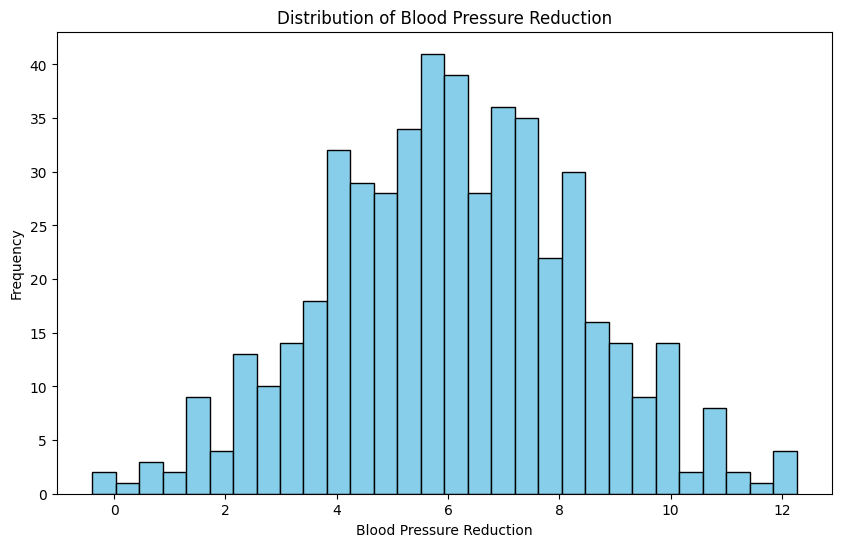

In [14]:
# checking coloumn distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df["Blood_Pressure_Reduction"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Blood Pressure Reduction")
plt.xlabel("Blood Pressure Reduction")
plt.ylabel("Frequency")
plt.show()

In [15]:
df["Blood_Pressure_Reduction"].describe()

count    500.000000
mean       6.063652
std        2.285906
min       -0.393773
25%        4.461729
50%        5.973330
75%        7.546879
max       12.264764
Name: Blood_Pressure_Reduction, dtype: float64

In [16]:
df["Treatment"].describe()

count          500
unique           2
top       Standard
freq           250
Name: Treatment, dtype: object

In [18]:
df["Treatment"].value_counts()

Treatment
Standard    250
New         250
Name: count, dtype: int64

### **Calculating the mean for both groups, New and Standard**

In [25]:
mean_new = df.groupby("Treatment")["Blood_Pressure_Reduction"].mean().loc["New"]
mean_new = round(mean_new, 2)
print(mean_new)

7.26


In [26]:
mean_standard = df.groupby("Treatment")["Blood_Pressure_Reduction"].mean().loc["Standard"]
mean_standard = round(mean_standard, 2)
print(mean_standard)

4.87


In [28]:
# Mean blood pressure reduction values for the two groups
mean_new = 7.26
mean_standard = 4.87

### **Visualising the Mean blood pressure reduction values for the two treatment groups**

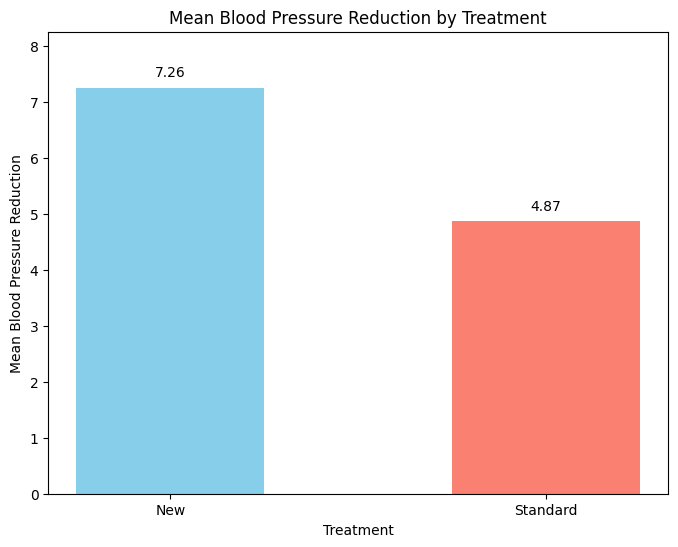

In [32]:
# Data for plotting the means
treatments = ["New", "Standard"]
means = [mean_new, mean_standard]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(treatments, means, color=["skyblue", "salmon"], width=0.5)
plt.title("Mean Blood Pressure Reduction by Treatment")
plt.xlabel("Treatment")
plt.ylabel("Mean Blood Pressure Reduction")
plt.ylim(0, max(means) + 1)  # Adjust y-axis limit for visibility
plt.text(0, mean_new + 0.2, f"{mean_new:.2f}", ha='center', color='black')
plt.text(1, mean_standard + 0.2, f"{mean_standard:.2f}", ha='center', color='black')

# Show plot
plt.show()

### **Calculating the standard deviation for the two treatment groups**

In [36]:
std_new = df.groupby("Treatment")["Blood_Pressure_Reduction"].std().loc["New"]
std_new = round(std_new, 2)
print(std_new)

1.92


In [37]:
std_standard = df.groupby("Treatment")["Blood_Pressure_Reduction"].std().loc["Standard"]
std_standard = round(std_standard, 2)
print(std_standard)

1.98


### **Getting the sample size for the two treatment groups**

In [43]:
sample_size_new = df.groupby("Treatment")["Blood_Pressure_Reduction"].count().loc["New"]
print(sample_size_new) # 250 values

sample_size_standard = df.groupby("Treatment")["Blood_Pressure_Reduction"].count().loc["Standard"]
print(sample_size_standard) # 250 values

250
250


### **Extracting individual BPR values for the two treatment groups**

In [61]:
standard_values = df[df["Treatment"] == "Standard"]["Blood_Pressure_Reduction"].values
print(f"Sample size for the Standard treatment group: {standard_values[:5]}") # checking for first 5 values as list

new_values = df[df["Treatment"] == "New"]["Blood_Pressure_Reduction"].values
print(f"Sample size for the New treatment group: {new_values[:5]}") # checking for first 5 values as list

Sample size for the Standard treatment group: [6.8523551  8.81883328 2.20286485 6.12593847 3.69871486]
Sample size for the New treatment group: [5.15353351 4.29663079 5.04825349 9.10728359 5.10120222]


### **Performing t-test and p-value for the two treatment groups**

In [58]:
t_stat,p_value = ttest_ind(standard_values, new_values)

print(f"T-Statistic: {round(t_stat, 2)}")
print(f"P-Value: {round(p_value, 2)}")

T-Statistic: -13.76
P-Value: 0.0


### **Visualising the Mean blood pressure reduction values for the two treatment groups**

C:\Users\44756\AppData\Local\Temp\ipykernel_31388\2499352737.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True, widths=0.6)


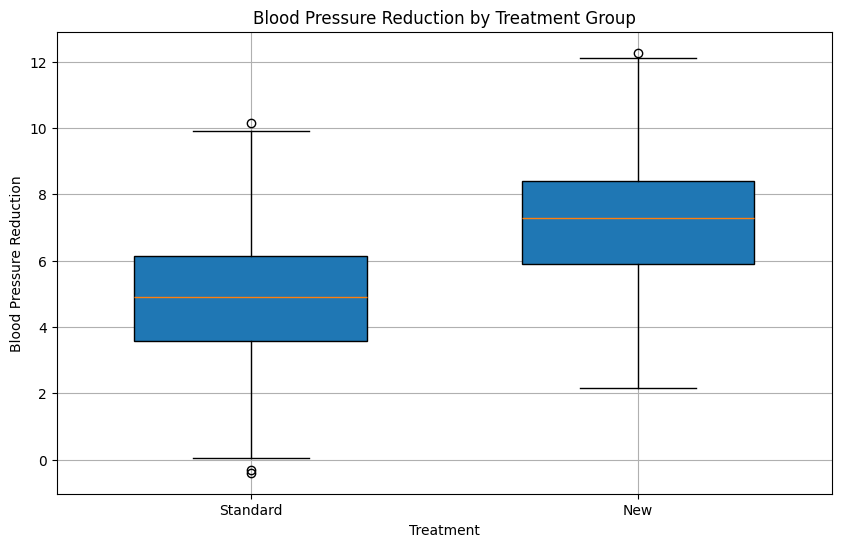

In [66]:
# Data preparation
data = [standard_values, new_values]
labels = ['Standard', 'New']

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True, widths=0.6)
plt.title("Blood Pressure Reduction by Treatment Group")
plt.xlabel("Treatment")
plt.ylabel("Blood Pressure Reduction")
plt.grid(True)

# Show plot
plt.show()

## **Testing Interpretation for Blood Pressure Reduction**

* #### Significant Difference: The low p-value (0.0) and large negative t-statistic (-13.76) indicate a significant difference in blood pressure reduction between the Standard and New treatments.
* #### Effectiveness: Since the t-statistic is negative, this implies that the New treatment group has a greater blood pressure reduction compared to the Standard treatment group as illustrated above in the box plot.

### In summary, the **New treatment is statistically and practically more effective than the Standard treatment in reducing blood pressure.**